# Data and Meaning
## PH 211 Lab
### January 16, 2021
### Zachary Bochanski
This lab further explores the use of python and jupyter as a means of documenting labs. Python is used to carry out calculations. Dependencies are used to assist in the calculations as well as display of the data. The lab compares the height ratio (HR) of two groups. Height ratio is described as the length of a stride compared to height. The next section explains the procedure in more detail.

The purpose of this is to work with individual data points. The lab uses measurements of human heigts and ditance traveled in a constant number of steps. A useful case for understanding this relationship is finding the height of an unkown individual.

### Overview
What is the height ratio? The height ratio is the length of a step related to height. To calculate this ratio first measuremnts must be taken. The required measurements are hight in meters (m) and length of 10 steps in meters (m).

### Measurements
1. A wall indicates the starting point. With heels placed agains the wall the subjects takes 10 normal steps forward then stops.
2. The distance from the wall to where the subject stopped is then measured. Only a tape-measure in feet (ft) is available so the measurement must be converted
3. Measure the height of the subject

### Conversions
1. Convert the distance of the number of steps taken to meters and height to meters.
$$ \large distance(m) = distance(ft)/3.2808 $$
$$ \large height(m) = height(ft)/3.2808 $$

### Calculations
1. Divide by 10 to get the length of a single step.
$$ \large step = distance(m)/10 $$
2. Divide answer by height to get HR.
$$ \large HR = step(m)/height(m) $$


### Imports
Import the tools needed for this lab. One library is not installed in the jlabenv using homebrew so the next step is to `pip --version` and `which python` to confirm the env is active, then `pip install matplotlib`.
- numpy is for working with numerical data in python
- matplotlib is for visualization of the data 

In [3]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

### Vectors
To begin working with the data points in this lab they need to be loaded into variables to be stored somewhere. Since there are two sets of data for females and males in this lab the variables will be labled accordingly. The variable names are in accordance with PEP8, which is the current reccomended best python practices. A pep (python enhancement proposal) is a document for the community to write with the "proper" style so code is more readable by everyone. 

The PEP8 convention for variables states: 
>"Use a lowercase single letter, word, or words. Separate words with underscores to improve readability."

Example: `variable_x` This style is sometimes refered to as "snake-case"

#### Variable names

The following are the names of the `lists` where the height ratio data is stored for this lab.

| Name             | Description                    |
|------------------| -------------------------------|
| female_hr_list   | female height ratios (meters)  |
| male_hr_list     | male height ratios (meters)    |


The following code cell reads in the updated csv file from github


In [82]:
# the height ratio data is recorded in a csv file, the csv library is needed
# the latest data is stored in the git repo, url library is needed, specifically request
from csv import reader
import urllib.request

# initialize lists
female_hr_list = []
male_hr_list = []

# url of latest csv
url = "https://github.com/ztbochanski/physics-211/raw/main/lab2-data-meaning/lab2-height-ratios.csv"

# open url and get response in bytes
with urllib.request.urlopen(url) as response:
    # skip the headers in the table
    next(response)
    # decode bytes from response to ascii charachters, response must be stored as strings not bytes
    lines = []
    for line in response:
        line = line.decode('utf-8')
        lines.append(line)

    # read each line of csv
    csv_reader = reader(lines)
    for line in csv_reader:
        # add column 1 to males
        # print("female:", line[0])
        female_hr_list.append(float(line[0]))
        
        # add column 2 to females
        # print("male:", line[1])
        male_hr_list.append(float(line[1]))
    
print("female height ratios:", female_hr_list)
print("male height ratios:", male_hr_list)


female height ratios: [0.32, 0.34, 0.3, 0.4, 0.32, 0.37, 0.34, 0.38, 0.38, 0.32]
male height ratios: [0.42, 0.61, 0.4, 0.41, 0.59, 0.36, 0.32, 0.41, 0.42, 0.34]


### Check data

Find the length of the lists of data to compare data sets

In [72]:
female_data = len(female_hr_list)
male_data = len(male_hr_list)

print("Number of female data points:", female_data)
print("Number of male data points:", male_data)

Number of female data points: 10
Number of male data points: 10


### Statistics

Use the `numpy` library for:
- mean value
- median value
- the standard deviation
- minimum value
- maximum value 

Call the various numpy methods by specifiying the imported class and method.

In [88]:
female_mean = np.mean(female_hr_list)
female_median = np.median(female_hr_list)
female_std = np.std(female_hr_list)
female_min = np.min(female_hr_list)
female_max = np.max(female_hr_list)
print("Female Mean", format(female_mean, ".2f"))
print("Female Median", female_median)
print("Female Std Dev", format(female_std, ".2f"))
print("Female Min", female_min)
print("Female Max", female_max)

Female Mean 0.35
Female Median 0.34
Female Std Dev 0.03
Female min 0.3
Female max 0.4


In [89]:
male_mean = np.mean(male_hr_list)
male_median = np.median(male_hr_list)
male_std = np.std(male_hr_list)
male_min = np.min(male_hr_list)
male_max = np.max(male_hr_list)
print("Male Mean", format(male_mean, ".2f"))
print("Male Median", male_median)
print("Male Std Dev", format(male_std, ".2f"))
print("Male Min", male_min)
print("Male Max", male_max)

Male Mean 0.43
Male Median 0.41
Male Std Dev 0.09
Male Min 0.32
Male Max 0.61


### Histograms and the 'Goldilocks Triplet'

Histograms and many other visual representations of the data can be created with `matplotlib`

The first histogram represent too many bins, the second not enough, and the last a good amount for the female data.

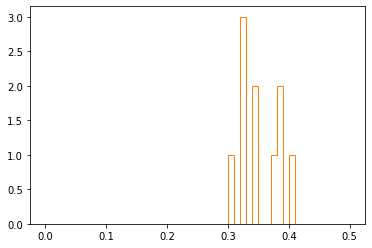

In [144]:
# too many bins
num_bins = 50
fullrange = [0,.5]
height, bins, patches = plt.hist(female_hr_list,
                                 num_bins,
                                 fullrange,
                                 histtype = "step",
                                 color="tab:orange",
                                )
plt.show()

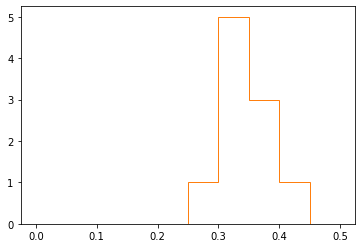

In [148]:
# color variables
FEMALE_HIST_COLOR = "tab:orange"
MALE_HIST_COLOR = "tab:purple"
# not enough bins
num_bins = 10
fullrange = [0,.5]
height, bins, patches = plt.hist(female_hr_list,
                                 num_bins,
                                 fullrange,
                                 histtype = "step",
                                 color=FEMALE_HIST_COLOR,
                                )
plt.show()

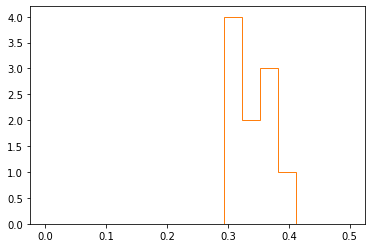

In [149]:
# decent number of bins
num_bins = 17
fullrange = [0,.5]
height, bins, patches = plt.hist(female_hr_list,
                                 num_bins,
                                 fullrange,
                                 histtype = "step",
                                 color=FEMALE_HIST_COLOR,
                                )
plt.show()

The 3 histograms above show different numbers of bins in the histograms. If there are too many bins then the points are too refined and it is visually too detaied. The rendered picture looks more like a bunch of lines and isn't very useful to someone looking at the picture. The picture is important for sharing and also for looking back on past work. It is much easier to view and image then look back at individual data points and make anything of them. 

The second histogram do not have enought bins in this case the bins are too large and encompass most of the data points, it's harder to see the mins, the max, and and fluctuation between them. The optimal number of bins shows as best as possible the min and max as well has the trend of the data over the dependent variable. In this case it can be ovserved that the data is skewed toward the minimum value and it can be most easily obeserved in the histogram with the optimal number of bins.

Additional experimentations with histogram are below.

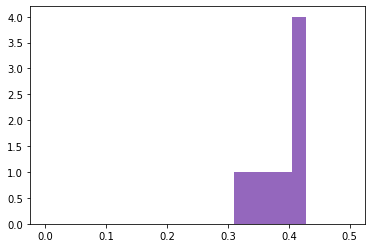

In [150]:
# male data with "auto" feature
num_bins = "auto"
fullrange = [0,.5]
height, bins, patches = plt.hist(male_hr_list,
                                 num_bins,
                                 fullrange,
                                 histtype = "bar",
                                 color=MALE_HIST_COLOR,
                                )
plt.show()

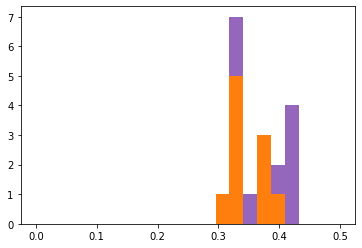

In [154]:
num_bins = "auto"
fullrange = [0,.5]
height, bins, patches = plt.hist([female_hr_list,male_hr_list],
                                 num_bins,
                                 fullrange,
                                 histtype = "barstacked",
                                 color=[FEMALE_HIST_COLOR,MALE_HIST_COLOR],
                                )
plt.show()

### Analysis I: Personal Data Point

The data point I recorded was .41. This ratio is within the range and below the mean value. It fit pretty well with the class's data set there was one other point at .41. .41 was aslo the median value for males


### Analysis II

Taking the difference between the mean and standard deviation for the female data set yeilds a value of .32 or positive .38. So the explected value for female height ratio would fall somewhere between .32 and .38. This is plus or minus the standard deviation from the mean value.

### Reflection

I learned that I need to understand more about how statistics work, I know these are basic concepts but I haven't had much experience or education with them. I'm thinknig I need to find a good statistics for beginners book. Next year stats for engineers in the education plan as well.

I think I focused a little too much time on the coding part of things this lab. I was trying to turn on my "computer science" brain and spent too much time working on the csv ingest script (should of done it the easy hard-coded way). This lab was a really fun excerise I'm loving doing the labs in jupyter labs.